In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
upload = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


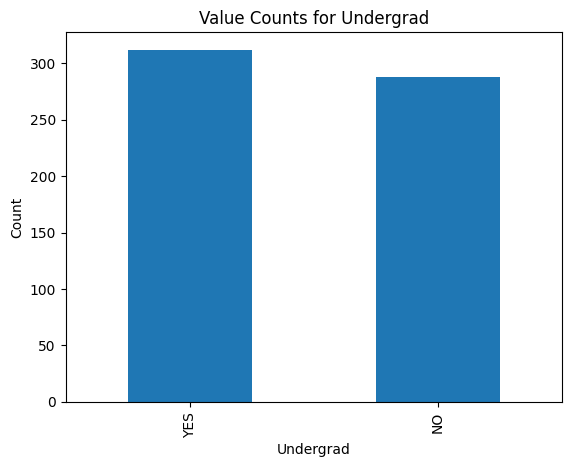

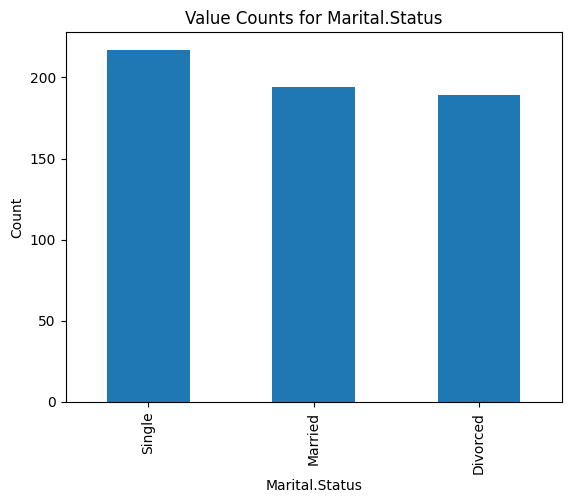

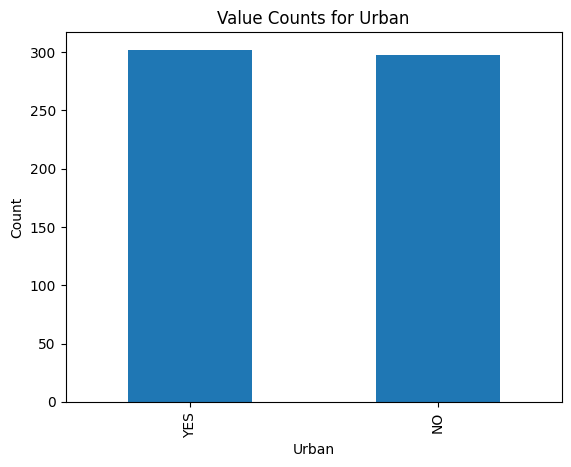

In [5]:
# List continuous columns
continuous_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
# List categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col])]
for col in categorical_columns:
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [6]:
df.shape

(600, 6)

In [7]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [8]:
df["Taxable.Income"] = ["Good" if value > 30000
               else "Risky" for value in df["Taxable.Income"]]
df["Taxable.Income"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

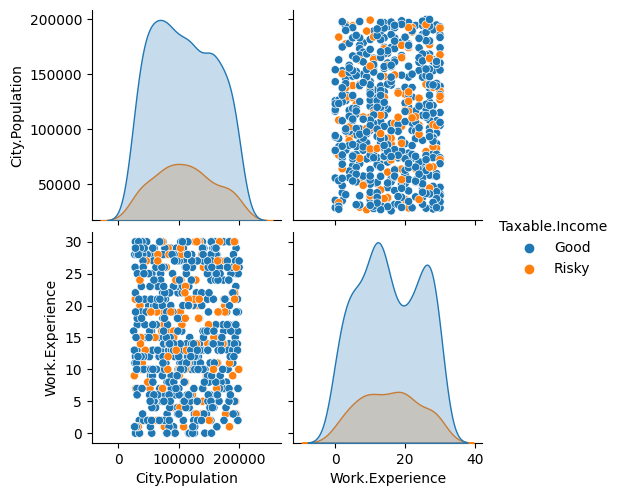

In [9]:
sns.pairplot(data=df, hue = 'Taxable.Income')

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,City.Population,Work.Experience
City.Population,1.000000,0.013135
Work.Experience,0.013135,1.000000


<ipython-input-11-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

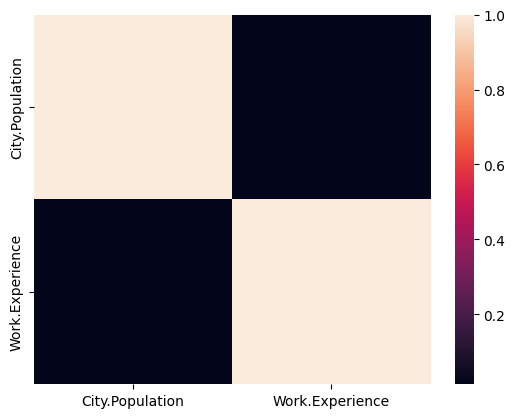

In [11]:
sns.heatmap(df.corr())

array([[<Axes: title={'center': 'City.Population'}>,
        <Axes: title={'center': 'Work.Experience'}>]], dtype=object)

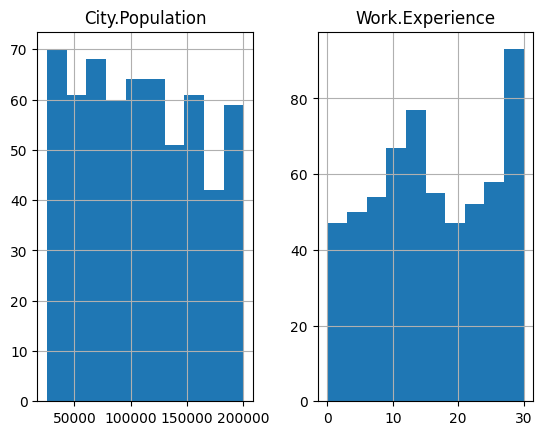

In [12]:
df.hist()

In [13]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [14]:
LE=LabelEncoder()
df["Undergrad"]=LE.fit_transform(df["Undergrad"])
df["Marital.Status"]=LE.fit_transform(df["Marital.Status"])
df["Urban"]=LE.fit_transform(df["Urban"])

In [15]:
SS=StandardScaler()
df["City.Population"]=SS.fit_transform(df["City.Population"].values.reshape(-1, 1))
df["Work.Experience"]=SS.fit_transform(df["Work.Experience"].values.reshape(-1, 1))

In [16]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,-1.178521,-0.629143,1
1,1,0,Good,0.508500,0.276370,1
2,0,1,Good,1.033109,1.634639,1
3,1,2,Good,1.696831,-0.063197,1
4,0,1,Good,-1.630532,1.408261,0


In [17]:
X = df.iloc[:, [0, 1, 3, 4, 5]]
Y=df["Taxable.Income"]

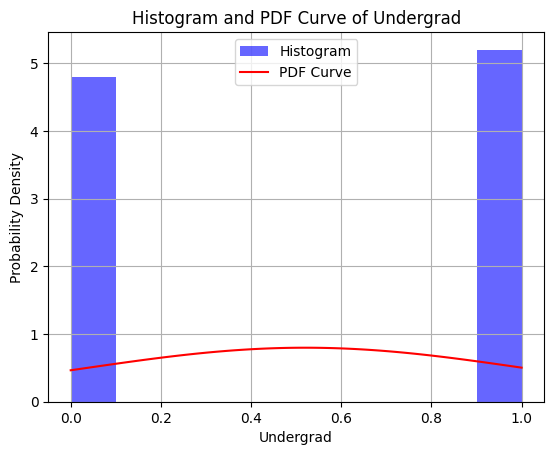

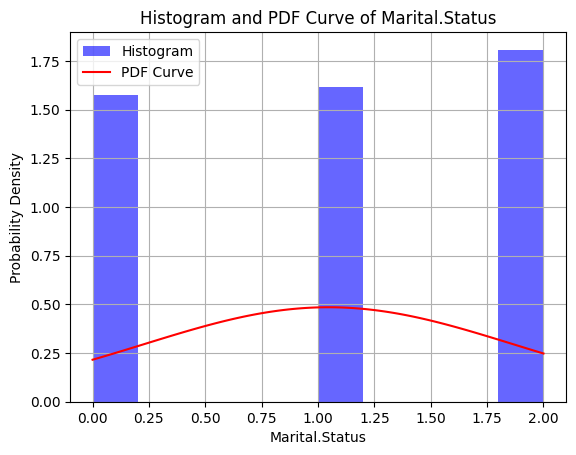

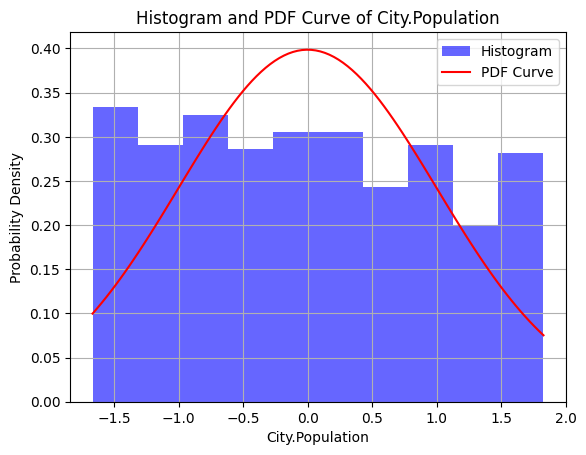

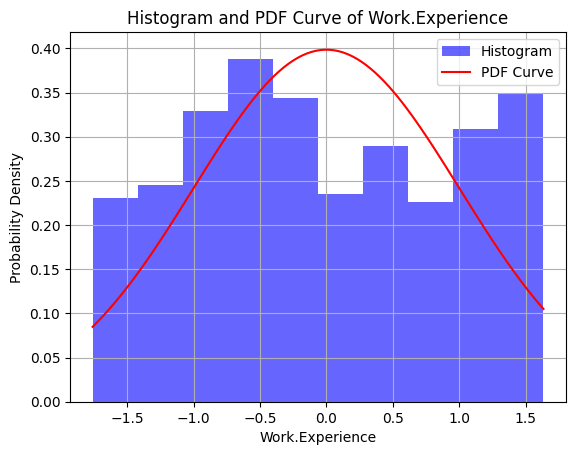

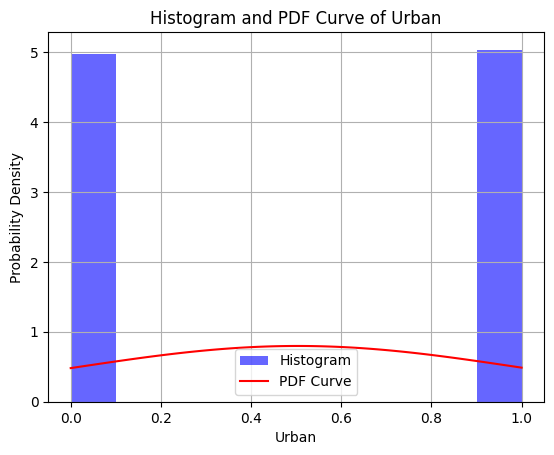

In [18]:
cont_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
cat_cols = [col for col in X.columns if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col])]
for col in cont_cols:
    X[col].hist(density=True, alpha=0.6, color='b', label='Histogram')

    # Compute the PDF curve
    mu, std = X[col].mean(), X[col].std()
    x = np.linspace(X[col].min(), X[col].max(), 100)
    pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)

    # Plot the PDF curve
    plt.plot(x, pdf, 'r', label='PDF Curve')

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.title(f'Histogram and PDF Curve of {col}')
    plt.legend()

    # Show the histogram with the curve
    plt.show()

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=47)

In [20]:
DT = DecisionTreeClassifier(criterion='gini',max_depth=8)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

In [21]:
ac1=accuracy_score(Y_train, Y_pred_train)
ac2=accuracy_score(Y_test, Y_pred_test)
print('Training accuracy: ',ac1)
print('Test accuracy: ',ac2)

Training accuracy:  0.8714285714285714
Test accuracy:  0.7166666666666667


In [22]:
print("No. of nodes: ", DT.tree_.node_count)
print("level of depth: ", DT.tree_.max_depth)

No. of nodes:  99
level of depth:  8


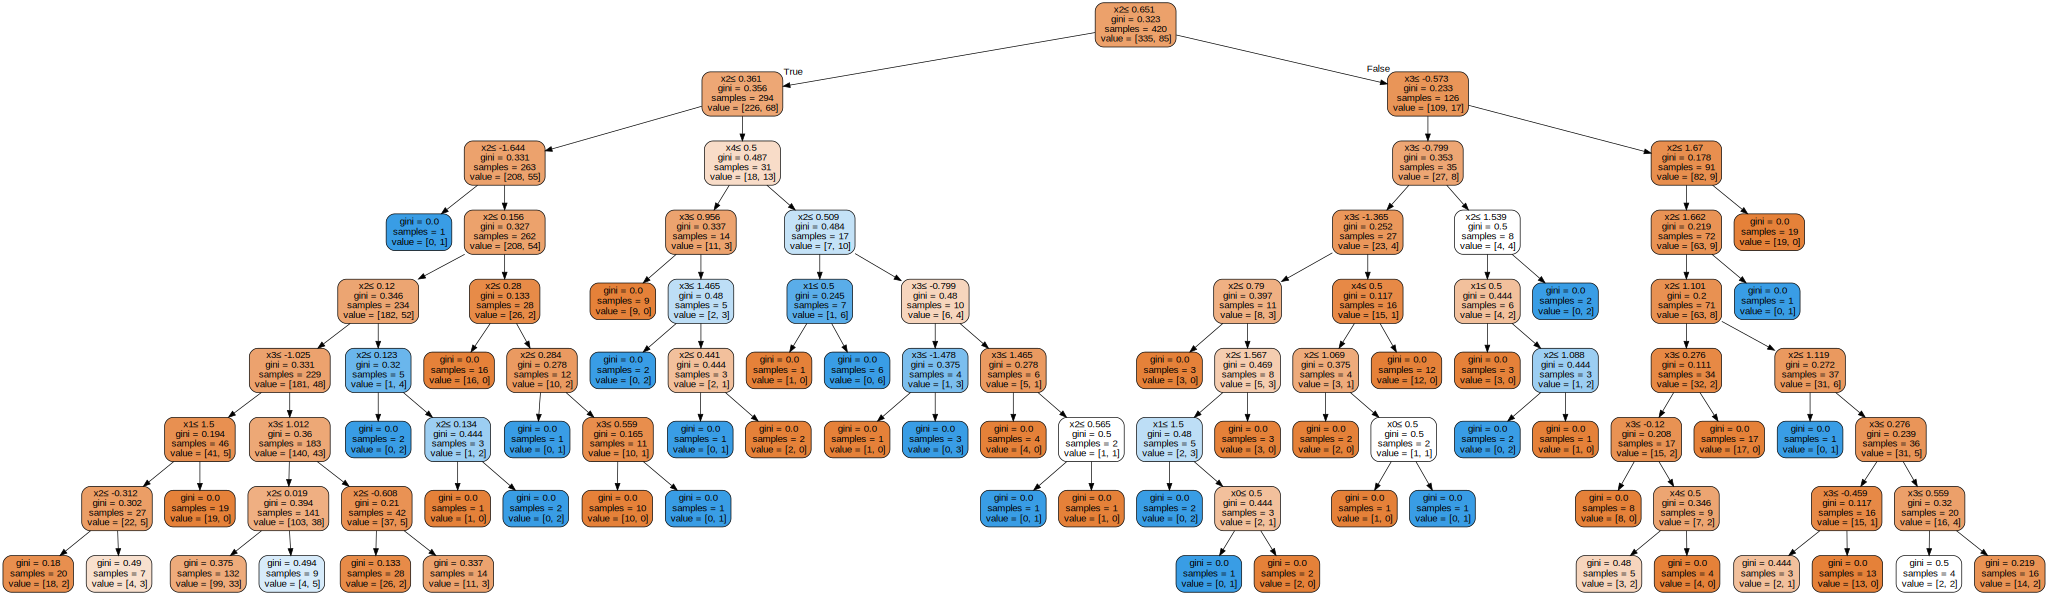

In [23]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DT,filled= True,rounded=True,special_characters= True)
graph = graphviz.Source(dot_data)
graph

In [24]:
# validation set approach
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=i,test_size=0.3)
    DT = DecisionTreeClassifier(criterion='gini', max_depth=8)
    DT.fit(x_train,y_train)
    y_pred_train = DT.predict(x_train)
    y_pred_test = DT.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))

print("Average Training Accuracy",np.mean(training_accuracy).round(3))
print("Average Testing Accuracy",np.mean(test_accuracy).round(3))

Average Training Accuracy 0.863
Average Testing Accuracy 0.731


This Decision Tree Classifier is good in predicting the FraudCheck with an average training accuracy of 0.86 and an average testing accuracy of 0.73 approximately